In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
from sklearn.preprocessing import LabelEncoder
import seaborn as sn
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
plt.style.use('ggplot')
from sklearn import metrics

## Data Understanding        

In [4]:
housePrice = pd.read_csv('train.csv', keep_default_na=False, low_memory=False)
housePrice.shape

(1460, 81)

In [5]:
# iterate over each row in the input file
labels = []
for i in housePrice['SalePrice']:
    if(i <= 150000):
        labels.append('LOW')
    elif(i > 150000 and i < 300000):
        labels.append('MEDIUM')
    else:
        labels.append('HIGH')
        
housePrice['PriceLabel'] = labels
housePrice['PriceLabel'] = housePrice['PriceLabel'].astype('category')

In [6]:
# how many elements are there (the attribute Id and salePrice is useless for data minning)
if all([item in housePrice.columns for item in ['Id']]):
    housePrice.drop(['Id'], axis=1, inplace=True)
if all([item in housePrice.columns for item in ['SalePrice']]):
    housePrice.drop(['SalePrice'], axis=1, inplace=True)
housePrice.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [7]:
housePrice.dtypes

MSSubClass          int64
MSZoning           object
LotFrontage        object
LotArea             int64
Street             object
                   ...   
MoSold              int64
YrSold              int64
SaleType           object
SaleCondition      object
PriceLabel       category
Length: 80, dtype: object

In [8]:
housePrice['PriceLabel'].unique()

['MEDIUM', 'LOW', 'HIGH']
Categories (3, object): ['HIGH', 'LOW', 'MEDIUM']

In [9]:
housePrice['PriceLabel']

0       MEDIUM
1       MEDIUM
2       MEDIUM
3          LOW
4       MEDIUM
         ...  
1455    MEDIUM
1456    MEDIUM
1457    MEDIUM
1458       LOW
1459       LOW
Name: PriceLabel, Length: 1460, dtype: category
Categories (3, object): ['HIGH', 'LOW', 'MEDIUM']

In [10]:
housePrice['PriceLabel'].value_counts()

MEDIUM    726
LOW       619
HIGH      115
Name: PriceLabel, dtype: int64

In [11]:
housePrice.describe()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,10516.828082,6.099315,5.575342,1971.267808,1984.865753,443.639726,46.549315,567.240411,1057.429452,...,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753
std,42.300571,9981.264932,1.382997,1.112799,30.202904,20.645407,456.098091,161.319273,441.866955,438.705324,...,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095
min,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,223.000000,795.750000,...,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,50.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,383.500000,0.000000,477.500000,991.500000,...,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,712.250000,0.000000,808.000000,1298.250000,...,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,5644.000000,1474.000000,2336.000000,6110.000000,...,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000


In [12]:
housePrice['MSSubClass'].mean()

56.897260273972606

In [13]:
housePrice.isnull()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,PriceLabel
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1457,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1458,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [14]:
housePrice.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
PriceLabel       0
Length: 80, dtype: int64

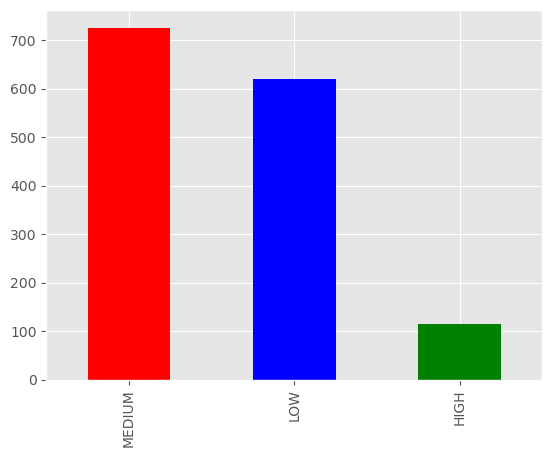

In [15]:
housePrice['PriceLabel'].value_counts().plot(kind = 'bar', color = ['red', 'blue', 'green'])
plt.show()

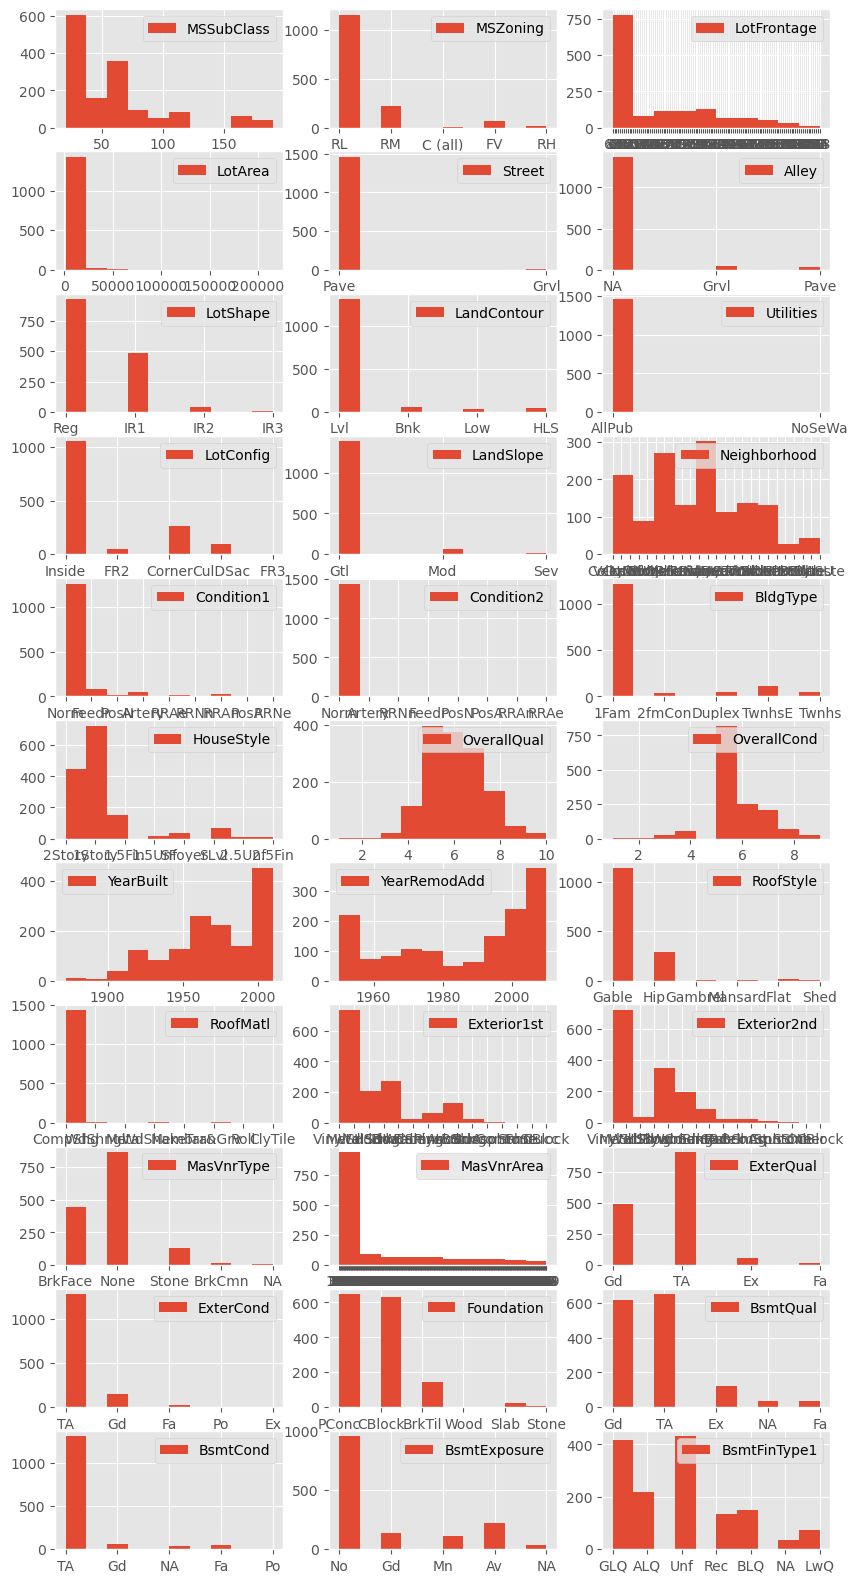

In [16]:
# set the value to object which shows in number(eg. MSSubClass is number but represent as catagory)
housePrice['MSSubClass'] = housePrice['MSSubClass'].astype(object)
    

# plot the Histogram
fig, ax = plt.subplots(11, 3, figsize = (10, 20))
series_list = []
for col in housePrice.columns:
    series_list.append(housePrice[col])
index = 0
for i in range(11):
    for j in range(3):
        series_list[index].hist(ax = ax[i, j], legend=True)
        index += 1
plt.show()

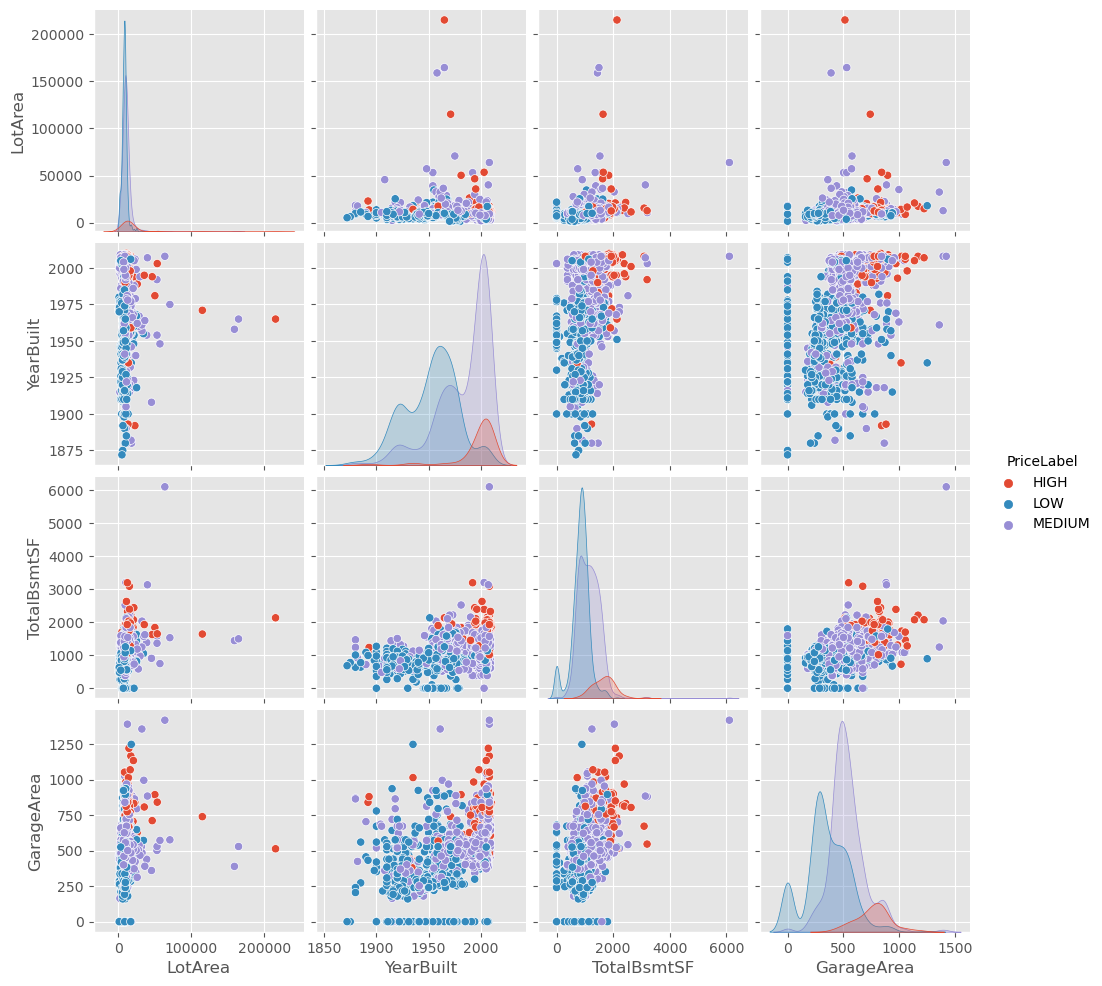

In [17]:
data = housePrice[['LotFrontage', 'LotArea', 'YearBuilt', 'TotalBsmtSF', 'GarageArea','Neighborhood','PriceLabel']]
sn.pairplot(data, hue = 'PriceLabel')
plt.show()

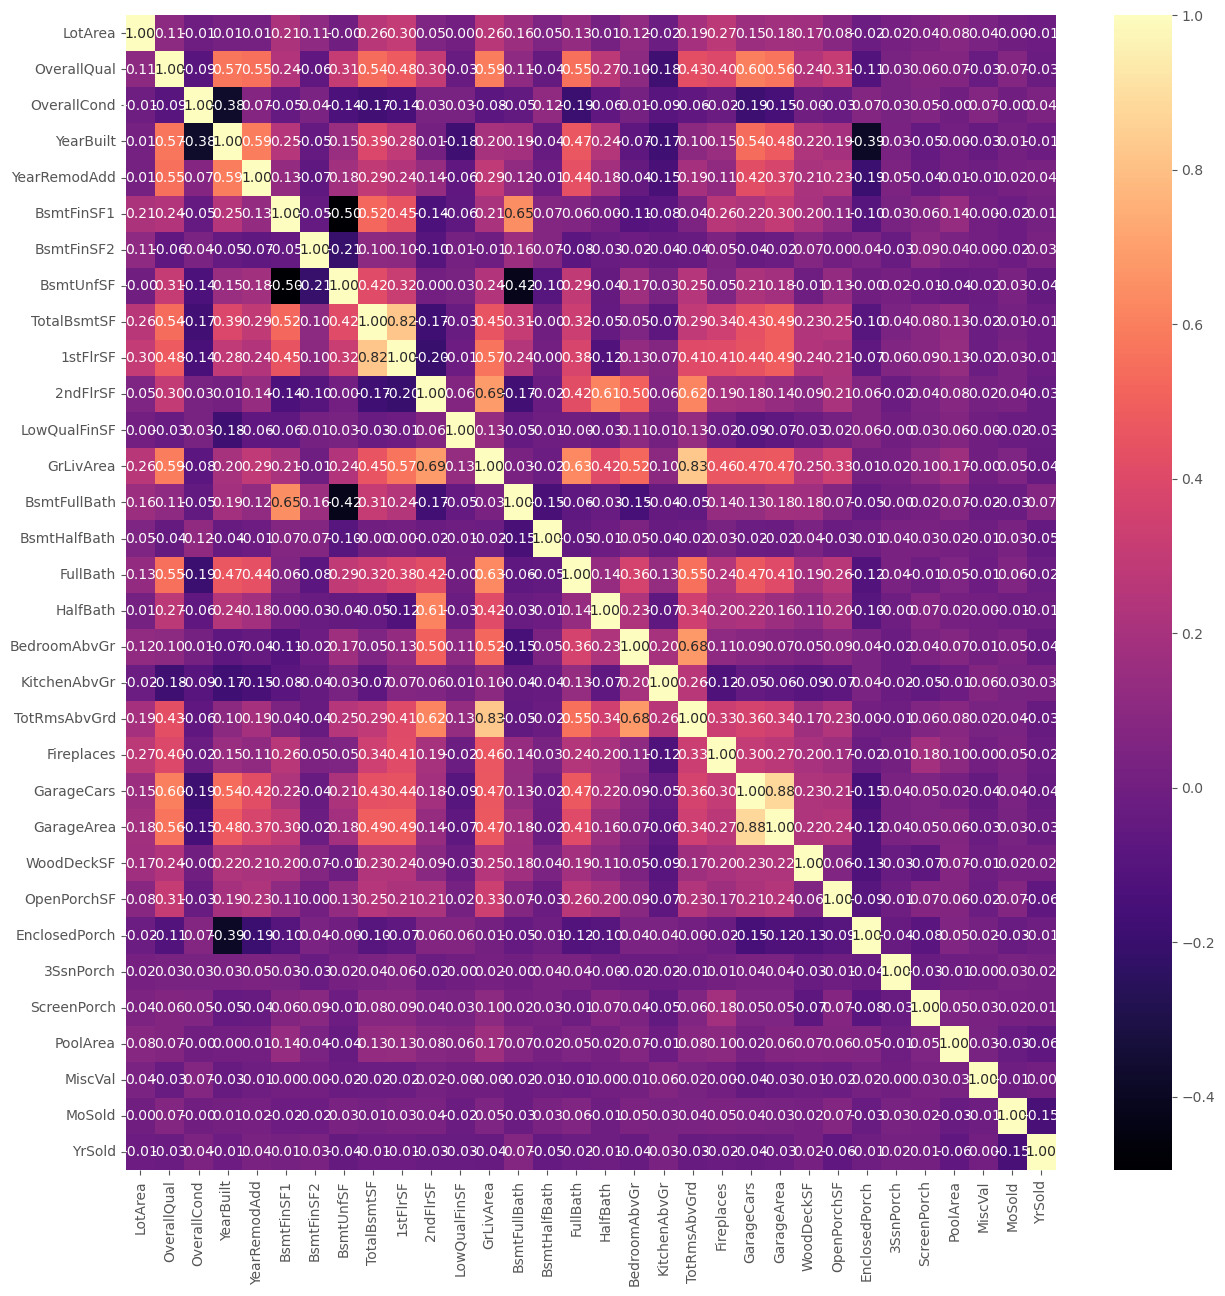

In [18]:
plt.figure(figsize = (15, 15))
sn.heatmap(housePrice.corr(), annot=True, cmap='magma', fmt='.2f')
plt.show()

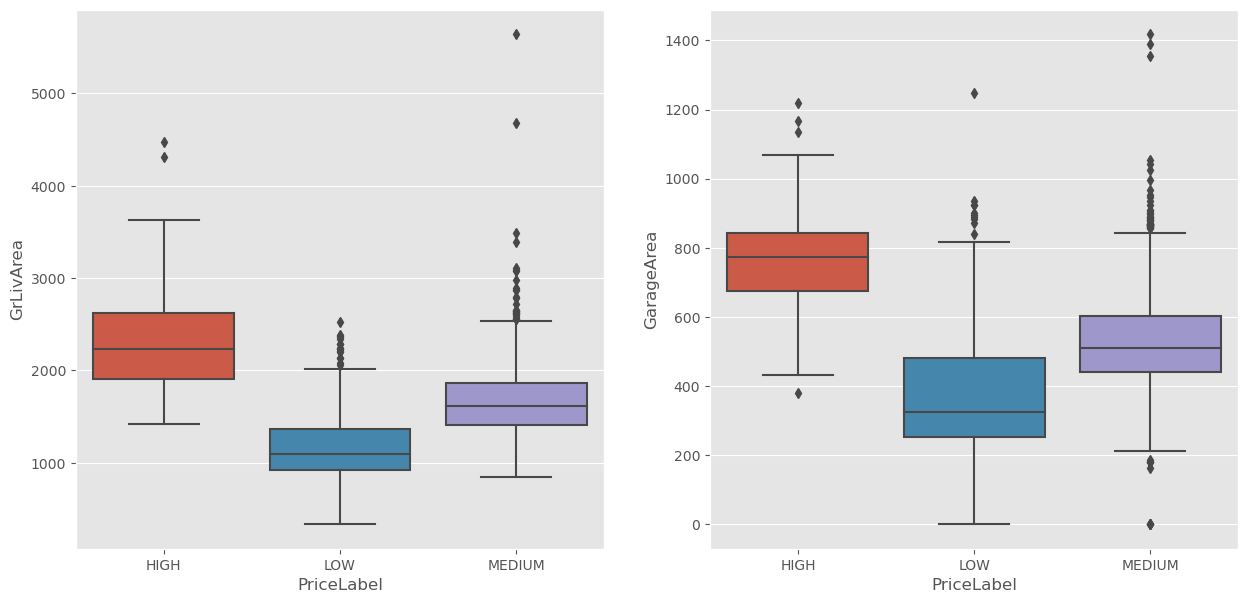

In [19]:
# 6.2 box plot
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
sn.boxplot(y = 'GrLivArea', x = 'PriceLabel', data = housePrice, ax = ax[0])
sn.boxplot(y = 'GarageArea', x = 'PriceLabel', data = housePrice, ax = ax[1])

plt.show()

# Data preparation

## 1. Data Cleaning
### 1.1 Fill in missing values

In [20]:
housePrice.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
PriceLabel       0
Length: 80, dtype: int64

**There does not exist missing value**

### 1.2. Identify and remove noise

In [21]:
housePrice.dtypes

MSSubClass         object
MSZoning           object
LotFrontage        object
LotArea             int64
Street             object
                   ...   
MoSold              int64
YrSold              int64
SaleType           object
SaleCondition      object
PriceLabel       category
Length: 80, dtype: object

In [22]:
# find out if the str attribute are same to the author's version. 
for column in housePrice:
    if(housePrice.dtypes[column] == 'object'):
        columnSeriesObj = housePrice[column]
        unique_list = list(set(columnSeriesObj.values))
        #print(column , ":",unique_list)

In [23]:
housePrice['LotFrontage'].replace('NA', 0, inplace=True)
housePrice['LotFrontage'] = housePrice['LotFrontage'].astype(float)
housePrice['LotFrontage'].replace(0, housePrice['LotFrontage'].mean(), inplace=True)

housePrice['MasVnrArea'].replace('NA', 0, inplace=True)
housePrice['MasVnrArea'] = housePrice['MasVnrArea'].astype(float)
housePrice['MasVnrArea'].replace(0, housePrice['MasVnrArea'].mean(), inplace=True)

housePrice['GarageYrBlt'].replace('NA', 0, inplace=True)
housePrice['GarageYrBlt'] = housePrice['GarageYrBlt'].astype(float)
housePrice['GarageYrBlt'].replace(0, housePrice['GarageYrBlt'].mean(), inplace=True)


    
    
# find out if the str attribute are same to the author's version. 
# Check the result again
for column in housePrice:
    if(housePrice.dtypes[column] == 'object'):
        columnSeriesObj = housePrice[column]
        unique_list = list(set(columnSeriesObj.values))
        #print(column , ":",unique_list)

In [25]:
for column in housePrice:
    if(housePrice.dtypes[column] == 'int64'):
        columnSeriesObj = housePrice[column]
        unique_list = list(set(columnSeriesObj.values))
        #print(column , ":",unique_list)

### 1.3 correct inconsistencies
**Because there only one dataset, so does not exist inconsistencies problem.**

### 2. Data integration
#### 2.1 Merge data from multiple sources.

In [26]:
import math

def entropy(labels):
    n_labels = len(labels)

    if n_labels <= 1:
        return 0

    # Convert labels to integers
    label_dict = {label: i for i, label in enumerate(set(labels))}
    labels = [label_dict[label] for label in labels]

    counts = np.bincount(labels)
    probs = counts / n_labels
    n_classes = np.count_nonzero(probs)

    if n_classes <= 1:
        return 0

    ent = 0.

    # Compute entropy
    for i in probs:
        ent -= i * math.log(i, n_classes)

    return ent

In [27]:
# Feature Subset Selection - remove the irrelevant or redundant features

for val in housePrice:
    if(entropy(housePrice[val]) < 0.2):
        print(val)
        housePrice.drop([val], axis=1, inplace=True)

Street
Utilities
Condition2
RoofMatl
BsmtFinSF2
Heating
Electrical
LowQualFinSF
KitchenAbvGr
Functional
3SsnPorch
ScreenPorch
PoolArea
PoolQC
MiscFeature
MiscVal


In [28]:
housePrice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 64 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   MSSubClass     1460 non-null   object  
 1   MSZoning       1460 non-null   object  
 2   LotFrontage    1460 non-null   float64 
 3   LotArea        1460 non-null   int64   
 4   Alley          1460 non-null   object  
 5   LotShape       1460 non-null   object  
 6   LandContour    1460 non-null   object  
 7   LotConfig      1460 non-null   object  
 8   LandSlope      1460 non-null   object  
 9   Neighborhood   1460 non-null   object  
 10  Condition1     1460 non-null   object  
 11  BldgType       1460 non-null   object  
 12  HouseStyle     1460 non-null   object  
 13  OverallQual    1460 non-null   int64   
 14  OverallCond    1460 non-null   int64   
 15  YearBuilt      1460 non-null   int64   
 16  YearRemodAdd   1460 non-null   int64   
 17  RoofStyle      1460 non-null   ob

In [29]:
# aggregation operation on quantitative attribute
housePrice.groupby(['YearBuilt']).mean()


,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,YrSold
YearBuilt,,,,,,,,,,,,,,,,,,,,,
1872,50.000000,5250.000000,8.000000,5.000000,1987.000000,103.117123,259.000000,425.000000,684.000000,938.000000,...,8.000000,0.000000,1868.739726,0.000000,0.000000,0.000000,54.000000,20.000000,12.000000,2008.000000
1875,54.000000,6342.000000,5.000000,8.000000,1996.000000,103.117123,0.000000,780.000000,780.000000,780.000000,...,6.000000,0.000000,1868.739726,0.000000,0.000000,0.000000,0.000000,176.000000,5.000000,2010.000000
1880,73.000000,12246.500000,6.250000,6.500000,1986.500000,103.117123,0.000000,1088.500000,1088.500000,1315.500000,...,8.500000,0.500000,1955.000000,2.250000,544.750000,120.750000,12.000000,169.750000,5.250000,2007.500000
1882,121.000000,17671.000000,8.000000,9.000000,1986.000000,103.117123,216.000000,700.000000,916.000000,916.000000,...,8.000000,1.000000,1925.000000,2.000000,424.000000,0.000000,169.000000,0.000000,11.000000,2009.000000
1885,60.000000,11070.000000,4.000000,6.500000,1972.500000,103.117123,0.000000,709.000000,709.000000,1146.500000,...,8.500000,0.000000,1962.500000,1.500000,416.500000,0.000000,0.000000,57.000000,6.000000,2008.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2006,76.417910,10402.432836,7.567164,5.000000,2006.313433,207.735514,333.223881,1022.805970,1356.029851,1371.283582,...,6.985075,0.761194,2004.115518,2.492537,677.537313,127.626866,67.701493,0.552239,7.000000,2006.970149
2007,78.224490,10456.306122,7.734694,5.081633,2007.306122,209.877369,500.224490,950.142857,1450.367347,1461.714286,...,7.142857,0.612245,2004.362035,2.510204,678.040816,107.448980,82.244898,0.000000,7.040816,2007.836735
2008,92.260870,14081.956522,8.652174,5.000000,2008.304348,329.053663,831.217391,1028.173913,1882.826087,1801.565217,...,8.347826,1.000000,2008.217391,2.739130,855.130435,104.347826,99.913043,0.000000,6.304348,2008.826087


In [30]:
# Feature creation
# conbine OverallQual+OverallCond 
# OverallQual: Rates the overall material and finish of the house
# OverallCond: Rates the overall condition of the house
housePrice['OverallQualCond'] = housePrice['OverallQual'] + housePrice['OverallCond']
housePrice.drop(['OverallQual'], axis=1, inplace=True)
housePrice.drop(['OverallCond'], axis=1, inplace=True)


In [31]:
housePrice.dtypes

MSSubClass           object
MSZoning             object
LotFrontage         float64
LotArea               int64
Alley                object
                     ...   
YrSold                int64
SaleType             object
SaleCondition        object
PriceLabel         category
OverallQualCond       int64
Length: 63, dtype: object

### 3. Data Transformation
#### 3.1 Normalization


In [32]:
housePrice

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,Fence,MoSold,YrSold,SaleType,SaleCondition,PriceLabel,OverallQualCond
0,60,RL,65.0,8450,NA,Reg,Lvl,Inside,Gtl,CollgCr,...,0,61,0,NA,2,2008,WD,Normal,MEDIUM,12
1,20,RL,80.0,9600,NA,Reg,Lvl,FR2,Gtl,Veenker,...,298,0,0,NA,5,2007,WD,Normal,MEDIUM,14
2,60,RL,68.0,11250,NA,IR1,Lvl,Inside,Gtl,CollgCr,...,0,42,0,NA,9,2008,WD,Normal,MEDIUM,12
3,70,RL,60.0,9550,NA,IR1,Lvl,Corner,Gtl,Crawfor,...,0,35,272,NA,2,2006,WD,Abnorml,LOW,12
4,60,RL,84.0,14260,NA,IR1,Lvl,FR2,Gtl,NoRidge,...,192,84,0,NA,12,2008,WD,Normal,MEDIUM,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,NA,Reg,Lvl,Inside,Gtl,Gilbert,...,0,40,0,NA,8,2007,WD,Normal,MEDIUM,11
1456,20,RL,85.0,13175,NA,Reg,Lvl,Inside,Gtl,NWAmes,...,349,0,0,MnPrv,2,2010,WD,Normal,MEDIUM,12
1457,70,RL,66.0,9042,NA,Reg,Lvl,Inside,Gtl,Crawfor,...,0,60,0,GdPrv,5,2010,WD,Normal,MEDIUM,16
1458,20,RL,68.0,9717,NA,Reg,Lvl,Inside,Gtl,NAmes,...,366,0,112,NA,4,2010,WD,Normal,LOW,11


## Modeling

### Random Forest

In [33]:
def make_confusion_matrix(cf, categories='auto', cbar=True, cmap='Blues', title=None):
    group_counts = [f'{value}\n' for value in cf.flatten()]

    box_labels = [f'{v1}'.strip() for v1 in group_counts]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])

    sn.heatmap(cf, annot=box_labels, fmt='', cmap=cmap, cbar=cbar, xticklabels=categories, yticklabels=categories)

    
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    if title:
        plt.title(title)

In [34]:
X = housePrice.drop('PriceLabel', axis=1)
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from joblib import dump
import random

X = housePrice.drop('PriceLabel', axis=1)
y = housePrice['PriceLabel']

ohe = OneHotEncoder()
X_encoded = ohe.fit_transform(X)
X = X_encoded


kf = KFold(n_splits=5)
# the n_estimators parameter specifies the number of decision trees in the random forest
rfc = RandomForestClassifier(n_estimators=30)
best_score = 0
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    rfc.fit(X_train, y_train)
    y_pred = rfc.predict(X_test)
    score=accuracy_score(y_test, y_pred)
    if score > best_score:
        best_score = score
        best_model = rfc
        print(best_score)
    
dump(best_model, 'random_forest.joblib')

0.8424657534246576
0.9041095890410958


['random_forest.joblib']

In [35]:
from sklearn.metrics import confusion_matrix
import joblib

# Load the saved model
model = joblib.load('random_forest.joblib')

# Predict the test data
y_pred = model.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print('confusion_matrix\n',cm)


confusion_matrix
 [[  9   0  10]
 [  0 114  11]
 [  4  21 123]]


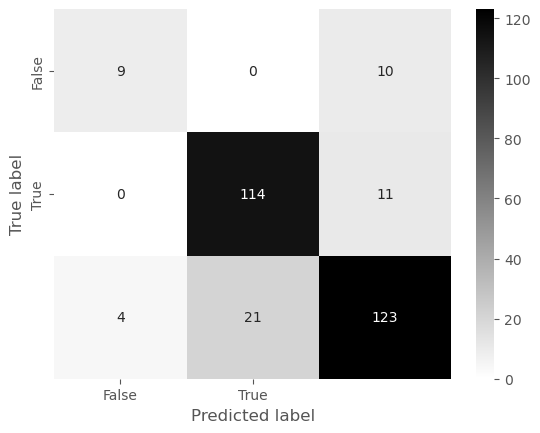

In [36]:
categories = ['False', 'True']
make_confusion_matrix(confusion_matrix(y_test, y_pred), categories=categories, cmap='binary')

In [37]:
#print('Accuracy:', accuracy_score(y_test, y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print('Randomforest report')
print(classification_report(y_test, y_pred))

Accuracy: 0.8424657534246576
Randomforest report
              precision    recall  f1-score   support

        HIGH       0.69      0.47      0.56        19
         LOW       0.84      0.91      0.88       125
      MEDIUM       0.85      0.83      0.84       148

    accuracy                           0.84       292
   macro avg       0.80      0.74      0.76       292
weighted avg       0.84      0.84      0.84       292



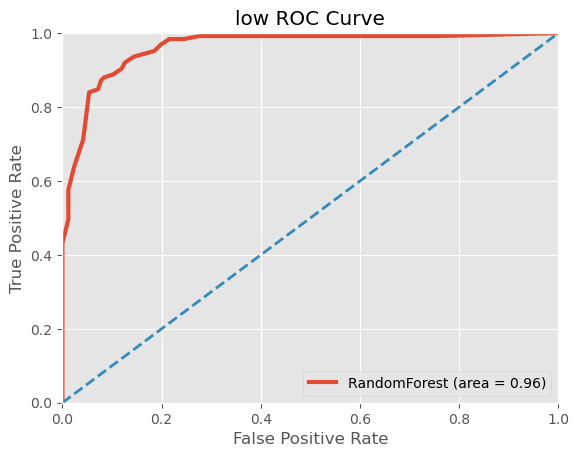

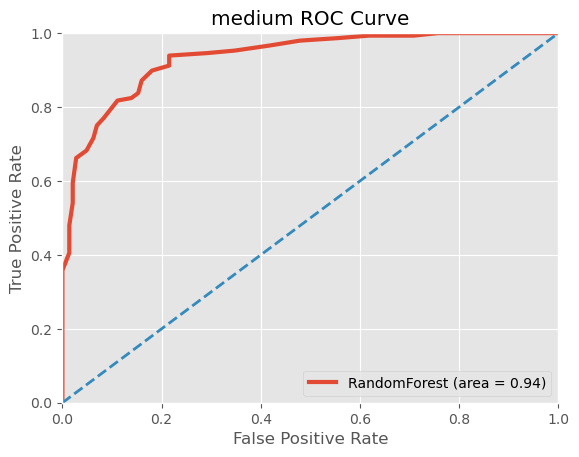

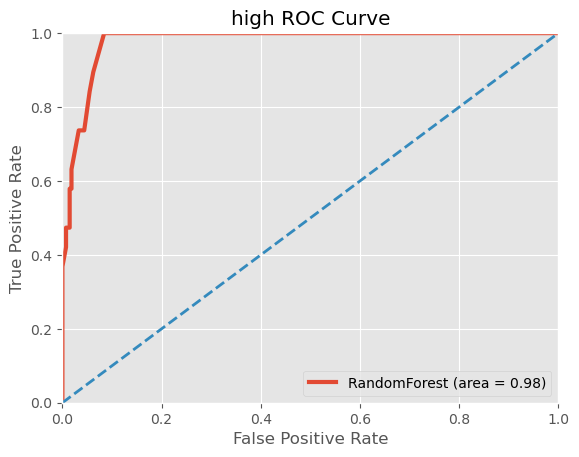

In [38]:
from sklearn.metrics import roc_curve, auc
import joblib

# Load the joblib file
model = joblib.load('random_forest.joblib')

# Get the predicted probabilities for the test set
y_pred_high = model.predict_proba(X_test)[:, 0]

# Get the predicted probabilities for the test set
y_pred_low = model.predict_proba(X_test)[:, 1]

# Get the predicted probabilities for the test set
y_pred_medium = model.predict_proba(X_test)[:, 2]


# Compute the false positive rate and true positive rate
fpr_low, tpr_low, thresholds = roc_curve(y_test, y_pred_low,pos_label='LOW')
#plt.plot(fpr_low, tpr_low)
roc_auc_low = metrics.auc(fpr_low, tpr_low)
plt.plot(fpr_low, tpr_low, lw=3, label="RandomForest" + f' (area = {roc_auc_low:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('low ROC Curve')
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.show()

fpr_medium, tpr_medium, thresholds = roc_curve(y_test, y_pred_medium,pos_label='MEDIUM')
roc_auc_medium = metrics.auc(fpr_medium, tpr_medium)
plt.plot(fpr_medium, tpr_medium, lw=3, label="RandomForest" + f' (area = {roc_auc_medium:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('medium ROC Curve')
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.show()


fpr_high, tpr_high, thresholds = roc_curve(y_test, y_pred_high,pos_label='HIGH')
roc_auc_high = metrics.auc(fpr_high, tpr_high)
plt.plot(fpr_high, tpr_high, lw=3, label="RandomForest" + f' (area = {roc_auc_high:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('high ROC Curve')
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.show()


### Neural Network

Converting categorical values into numeric using the sklearn library and in particular the OneHotEncoding class

In [39]:
X = housePrice.drop('PriceLabel', axis=1)
y = housePrice['PriceLabel']

ohe = OneHotEncoder()
X_encoded = ohe.fit_transform(X)
X = X_encoded



Creating a training set and a test set

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40)
print(X_train.shape); print(X_test.shape)

(1022, 7299)
(438, 7299)


Creation of the neural network with parameters tested on different ranges. As an activation function we use 'relu' because it fits better with our training set as a solver we use 'sgd'. The parameters alpha, can be used to control possible 'overfitting' and 'underfitting has been chosen over a range as well as tolerance.

mlp.fit allows you to fit the model to the training data
mlp.predict allows you to predict the training and test set

In [41]:
from sklearn.neural_network import MLPClassifier


mlp = MLPClassifier(hidden_layer_sizes=(5,5), 
                        activation='relu', 
                        random_state=1,
                        alpha=0.030888435964774818,
                        max_iter=500,
                        solver='sgd', 
                        tol=1e-5,
                        learning_rate_init=0.1, 
                        verbose=False)

mlp.fit(X_train,y_train)

predict_train_mlp = mlp.predict(X_train)
predict_test_mlp = mlp.predict(X_test)

In [42]:
from sklearn.metrics import classification_report
print("PREDICTION TRAINING SET")
print(confusion_matrix(y_train,predict_train_mlp))
print(classification_report(y_train,predict_train_mlp))

PREDICTION TRAINING SET
[[ 90   0   0]
 [  1 442   3]
 [  3   1 482]]
              precision    recall  f1-score   support

        HIGH       0.96      1.00      0.98        90
         LOW       1.00      0.99      0.99       446
      MEDIUM       0.99      0.99      0.99       486

    accuracy                           0.99      1022
   macro avg       0.98      0.99      0.99      1022
weighted avg       0.99      0.99      0.99      1022



In [43]:
print("PREDICTION TEST SET")
print(confusion_matrix(y_test,predict_test_mlp))
print(classification_report(y_test,predict_test_mlp))

PREDICTION TEST SET
[[ 18   0   7]
 [  0 160  13]
 [  6  27 207]]
              precision    recall  f1-score   support

        HIGH       0.75      0.72      0.73        25
         LOW       0.86      0.92      0.89       173
      MEDIUM       0.91      0.86      0.89       240

    accuracy                           0.88       438
   macro avg       0.84      0.84      0.84       438
weighted avg       0.88      0.88      0.88       438



In [44]:
print(f'Accuracy: {accuracy_score(y_test, predict_test_mlp):.2f}')

Accuracy: 0.88


#### Evaluation Neural Network

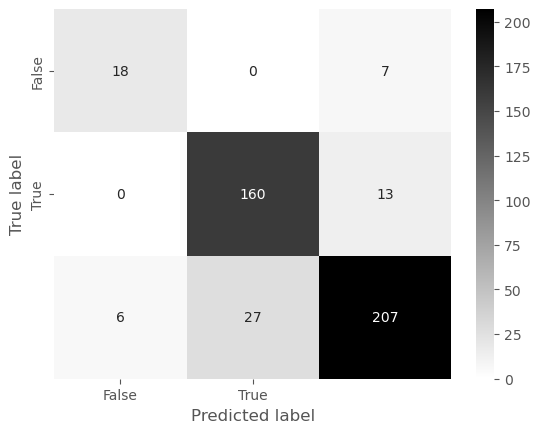

In [45]:
categories = ['False', 'True']
make_confusion_matrix(confusion_matrix(y_test, predict_test_mlp), categories=categories, cmap='binary')

In [46]:
print('Classification report')
print(classification_report(y_test, predict_test_mlp))

Classification report
              precision    recall  f1-score   support

        HIGH       0.75      0.72      0.73        25
         LOW       0.86      0.92      0.89       173
      MEDIUM       0.91      0.86      0.89       240

    accuracy                           0.88       438
   macro avg       0.84      0.84      0.84       438
weighted avg       0.88      0.88      0.88       438



Compute the Roc Curve for each class

In [47]:
one_hot_encoding = np.array(pd.get_dummies(y_test, columns = ['PriceLabel']))

In [48]:
probs = {}

probs["Neural Network"] = mlp.predict_proba(X_test)

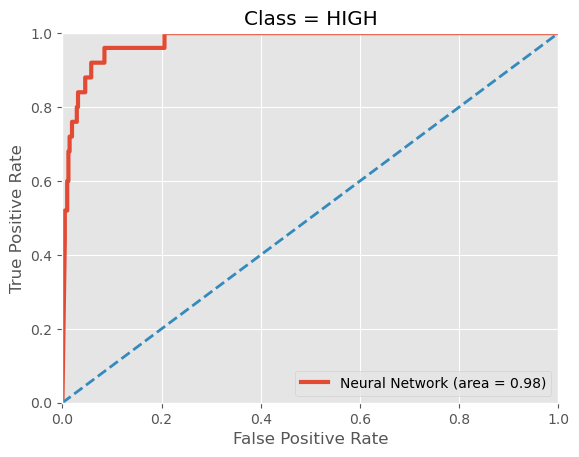

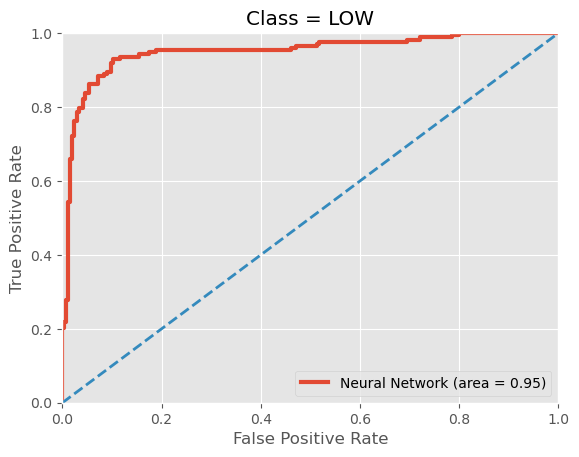

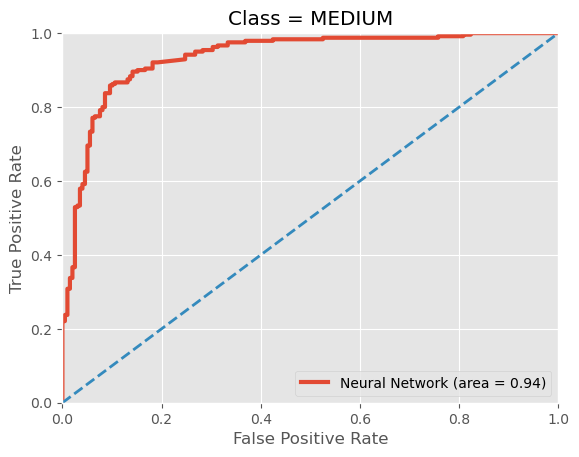

In [49]:
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(np.unique(y))):
    plt.figure()

    fpr[i], tpr[i], _ = roc_curve(one_hot_encoding[:, i], probs["Neural Network"][:, i])
        
    roc_auc[i] = auc(fpr[i], tpr[i])

    plt.plot(fpr[i], tpr[i], lw=3, label="Neural Network" + f' (area = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Class = ' + str(np.unique(y)[i]))
    plt.legend(loc='lower right')

    plt.show()  

[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[3.11217054e-12 2.30911452e-14 9.23453219e-01 1.00820918e-21
 6.91228219e-07 5.85553566e-25 1.06730859e-19 2.22

NameError: name 'm' is not defined

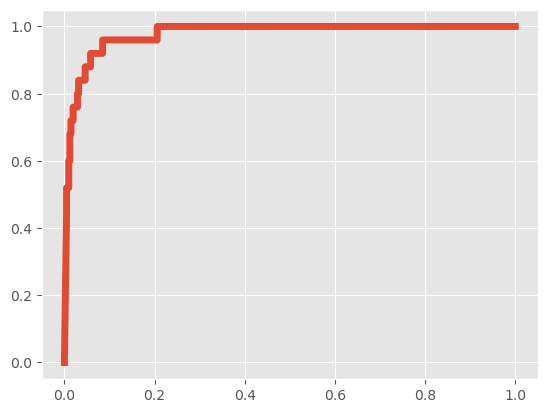

In [50]:
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(np.unique(y))):
    plt.figure()

    fpr[i], tpr[i], _ = roc_curve(one_hot_encoding[:, i], probs["Neural Network"][:, i])
        
    print(one_hot_encoding[:, i])
    print(probs["Neural Network"][:, i])
        
    roc_auc[i] = auc(fpr[i], tpr[i])

    plt.plot(fpr[i], tpr[i], lw=5, label="" + f' (area = {roc_auc[i]:.2f})')
    m += 1
        
    if m==2:
        break
    break

In [51]:
one_hot_encoding[:, 0]

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [52]:
probs["Neural Network"][:, 0]

array([3.11217054e-12, 2.30911452e-14, 9.23453219e-01, 1.00820918e-21,
       6.91228219e-07, 5.85553566e-25, 1.06730859e-19, 2.22763018e-18,
       1.99921629e-17, 1.95553844e-15, 2.83547236e-19, 3.35008373e-10,
       8.54771201e-14, 4.19842983e-22, 1.67741130e-24, 3.68613439e-01,
       1.41869855e-16, 3.31038057e-03, 9.58986555e-01, 7.67621399e-14,
       1.58837370e-14, 1.22618534e-14, 2.53361294e-18, 2.99134617e-18,
       5.20044448e-15, 4.18374697e-21, 8.94285884e-01, 1.48981910e-19,
       5.81451589e-18, 5.04811337e-15, 5.08693203e-20, 9.23375955e-06,
       5.08024442e-16, 1.16002421e-14, 1.69123946e-16, 4.33855601e-17,
       2.84337752e-18, 1.35085066e-04, 3.70706067e-18, 9.54500617e-01,
       3.08612695e-24, 2.65181651e-26, 1.36128350e-20, 1.23293969e-16,
       4.42817385e-27, 4.29120916e-25, 4.90693074e-10, 2.36667158e-03,
       7.97701945e-14, 9.26139057e-16, 1.18411406e-10, 1.82491553e-17,
       2.78735005e-16, 1.63488865e-15, 5.73384696e-18, 1.20810104e-10,
      

In [53]:
roc_curve(one_hot_encoding[:, 0], probs["Neural Network"][:, 0])

(array([0.        , 0.00484262, 0.00484262, 0.00968523, 0.00968523,
        0.01210654, 0.01210654, 0.01452785, 0.01452785, 0.01937046,
        0.01937046, 0.02905569, 0.02905569, 0.031477  , 0.031477  ,
        0.04600484, 0.04600484, 0.05811138, 0.05811138, 0.08474576,
        0.08474576, 0.20581114, 0.20581114, 1.        ]),
 array([0.  , 0.44, 0.52, 0.52, 0.6 , 0.6 , 0.68, 0.68, 0.72, 0.72, 0.76,
        0.76, 0.8 , 0.8 , 0.84, 0.84, 0.88, 0.88, 0.92, 0.92, 0.96, 0.96,
        1.  , 1.  ]),
 array([1.95898656e+00, 9.58986555e-01, 9.56438883e-01, 9.50686927e-01,
        9.37134264e-01, 9.24998192e-01, 9.11763213e-01, 8.94285884e-01,
        6.39578649e-01, 3.15477179e-01, 1.77762233e-01, 5.51840418e-03,
        3.31038057e-03, 2.69544508e-03, 2.65215545e-03, 6.80106351e-04,
        3.28490870e-04, 5.05418630e-05, 2.55312559e-05, 6.83283479e-07,
        6.62836763e-07, 1.50700946e-11, 1.38447512e-11, 4.42817385e-27]))

### Adaboost

In [54]:
# Load libraries
from sklearn.ensemble import AdaBoostClassifier
#Import scikit-learn metrics module for accuracy calculation

In [55]:
# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=110, learning_rate=1)

# Train Adaboost Classifer
model = abc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)

In [56]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8356164383561644


In [57]:
predict_train_abc = abc.predict(X_train)
predict_test_abc = abc.predict(X_test)

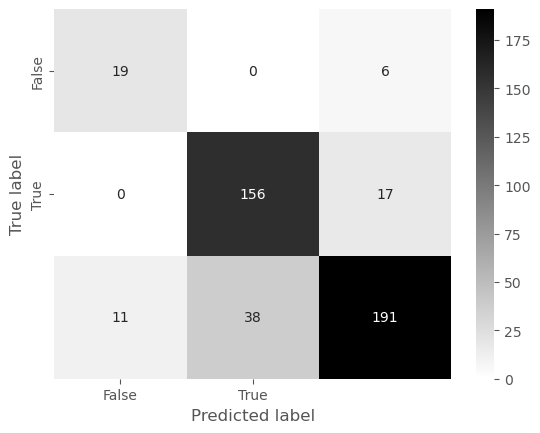

In [58]:
categories = ['False', 'True']
make_confusion_matrix(confusion_matrix(y_test, predict_test_abc), categories=categories, cmap='binary')

In [59]:
print('Classification report')
print(classification_report(y_test, predict_test_abc))

Classification report
              precision    recall  f1-score   support

        HIGH       0.63      0.76      0.69        25
         LOW       0.80      0.90      0.85       173
      MEDIUM       0.89      0.80      0.84       240

    accuracy                           0.84       438
   macro avg       0.78      0.82      0.79       438
weighted avg       0.84      0.84      0.84       438



In [60]:
probs["AdaBoost"] = abc.predict_proba(X_test)

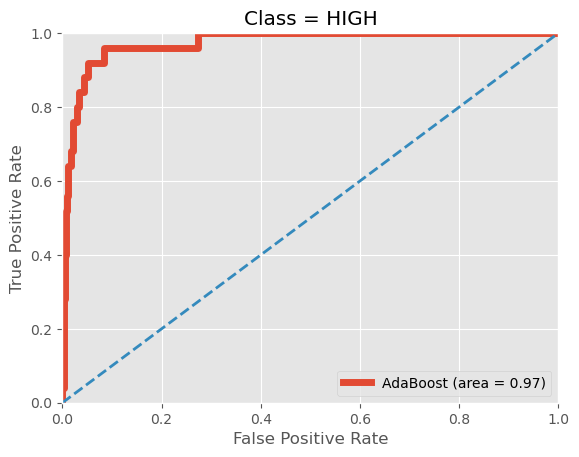

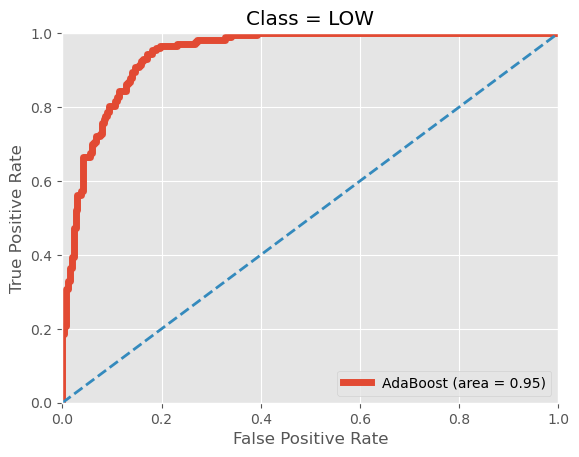

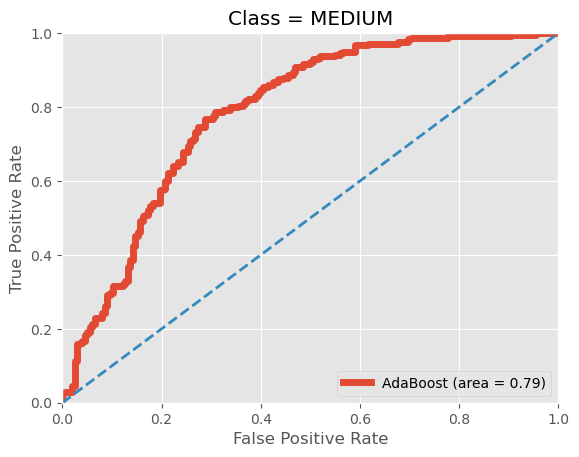

In [61]:
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(np.unique(y))):
    plt.figure()

    fpr[i], tpr[i], _ = roc_curve(one_hot_encoding[:, i], probs["AdaBoost"][:, i])
        
    roc_auc[i] = auc(fpr[i], tpr[i])

    plt.plot(fpr[i], tpr[i], lw=5, label="AdaBoost" + f' (area = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Class = ' + str(np.unique(y)[i]))
    plt.legend(loc='lower right')

    plt.show() 

[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0.33159715 0.23371515 0.40138407 0.2422613  0.3602729  0.17378336
 0.19840257 0.17997177 0.18536471 0.27985513

NameError: name 'm' is not defined

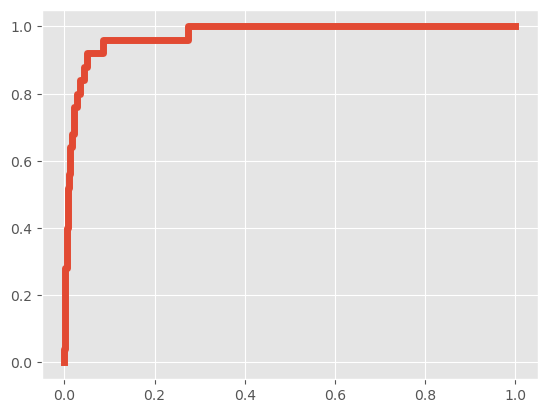

In [62]:
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(np.unique(y))):
    plt.figure()

    fpr[i], tpr[i], _ = roc_curve(one_hot_encoding[:, i], probs["AdaBoost"][:, i])
        
    print(one_hot_encoding[:, i])
    print(probs["AdaBoost"][:, i])
        
    roc_auc[i] = auc(fpr[i], tpr[i])

    plt.plot(fpr[i], tpr[i], lw=5, label="" + f' (area = {roc_auc[i]:.2f})')
    m += 1
        
    if m==2:
        break
    break

In [63]:
one_hot_encoding[:, 0]

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [64]:
probs["AdaBoost"][:, 0]

array([0.33159715, 0.23371515, 0.40138407, 0.2422613 , 0.3602729 ,
       0.17378336, 0.19840257, 0.17997177, 0.18536471, 0.27985513,
       0.18504331, 0.32833099, 0.30192395, 0.16124077, 0.24176414,
       0.39592593, 0.30278186, 0.41497591, 0.4547071 , 0.17316658,
       0.30050733, 0.2285283 , 0.18731731, 0.20489372, 0.23736176,
       0.19394899, 0.41598764, 0.27167518, 0.17089989, 0.23496355,
       0.19475197, 0.33795173, 0.18838695, 0.19538943, 0.16322326,
       0.1845549 , 0.24623381, 0.37138794, 0.33103057, 0.46072221,
       0.18225339, 0.16425862, 0.18547034, 0.24904338, 0.19668688,
       0.14853741, 0.37804568, 0.31299801, 0.26087393, 0.2803498 ,
       0.37372356, 0.2240109 , 0.19233909, 0.18292391, 0.24789633,
       0.34476089, 0.18523403, 0.24866078, 0.18736733, 0.19572733,
       0.17244117, 0.17498084, 0.37471579, 0.21242556, 0.16911641,
       0.38538324, 0.3573989 , 0.18366744, 0.1636305 , 0.28591173,
       0.27041025, 0.16664027, 0.24322379, 0.260168  , 0.35760

In [65]:
roc_curve(one_hot_encoding[:, 0], probs["AdaBoost"][:, 0])

(array([0.        , 0.        , 0.00242131, 0.00242131, 0.00484262,
        0.00484262, 0.00726392, 0.00726392, 0.00968523, 0.00968523,
        0.01210654, 0.01210654, 0.01694915, 0.01694915, 0.02179177,
        0.02179177, 0.02905569, 0.02905569, 0.03389831, 0.03389831,
        0.04358354, 0.04358354, 0.05084746, 0.05084746, 0.08474576,
        0.08474576, 0.27360775, 0.27360775, 0.46004843, 0.46489104,
        0.58595642, 0.59079903, 1.        ]),
 array([0.  , 0.04, 0.04, 0.28, 0.28, 0.4 , 0.4 , 0.52, 0.52, 0.56, 0.56,
        0.64, 0.64, 0.68, 0.68, 0.76, 0.76, 0.8 , 0.8 , 0.84, 0.84, 0.88,
        0.88, 0.92, 0.92, 0.96, 0.96, 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ]),
 array([1.46638211, 0.46638211, 0.46072221, 0.44383487, 0.4438209 ,
        0.43750006, 0.43623621, 0.43004672, 0.42982703, 0.42644916,
        0.41598764, 0.41016499, 0.40841521, 0.40728938, 0.4023916 ,
        0.40033024, 0.39592593, 0.39414726, 0.38745087, 0.38538324,
        0.37919577, 0.37854863, 0.37625144, 0.3755

# Naive Bayes

In [66]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
import seaborn as sns
from sklearn.metrics import classification_report

In [83]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=40
)
print(X_train.shape); print(X_test.shape)

(1022, 7299)
(438, 7299)


In [84]:
from sklearn.naive_bayes import GaussianNB


# instantiate the model
gnb = GaussianNB()

dense_array = X_train.toarray()
dense_test= X_test.toarray()
# fit the model
gnb.fit(dense_array, y_train)

GaussianNB()

In [85]:
y_pred = gnb.predict(dense_test)

y_pred

array(['LOW', 'MEDIUM', 'MEDIUM', 'MEDIUM', 'MEDIUM', 'LOW', 'LOW', 'LOW',
       'LOW', 'MEDIUM', 'LOW', 'MEDIUM', 'MEDIUM', 'MEDIUM', 'LOW',
       'MEDIUM', 'MEDIUM', 'MEDIUM', 'HIGH', 'MEDIUM', 'MEDIUM', 'LOW',
       'LOW', 'LOW', 'LOW', 'LOW', 'MEDIUM', 'HIGH', 'LOW', 'MEDIUM',
       'LOW', 'MEDIUM', 'LOW', 'MEDIUM', 'MEDIUM', 'MEDIUM', 'MEDIUM',
       'LOW', 'MEDIUM', 'MEDIUM', 'LOW', 'LOW', 'LOW', 'MEDIUM', 'MEDIUM',
       'LOW', 'HIGH', 'MEDIUM', 'LOW', 'MEDIUM', 'MEDIUM', 'MEDIUM',
       'MEDIUM', 'LOW', 'MEDIUM', 'MEDIUM', 'LOW', 'MEDIUM', 'LOW',
       'MEDIUM', 'LOW', 'LOW', 'MEDIUM', 'LOW', 'MEDIUM', 'MEDIUM', 'LOW',
       'LOW', 'LOW', 'MEDIUM', 'MEDIUM', 'LOW', 'MEDIUM', 'MEDIUM',
       'MEDIUM', 'LOW', 'MEDIUM', 'MEDIUM', 'MEDIUM', 'MEDIUM', 'MEDIUM',
       'LOW', 'MEDIUM', 'MEDIUM', 'MEDIUM', 'MEDIUM', 'LOW', 'MEDIUM',
       'LOW', 'LOW', 'LOW', 'LOW', 'MEDIUM', 'LOW', 'MEDIUM', 'LOW',
       'LOW', 'MEDIUM', 'LOW', 'MEDIUM', 'MEDIUM', 'LOW', 'LOW', 'MEDIUM',


In [86]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.7215


In [88]:
y_pred_train = gnb.predict(dense_array)

y_pred_train

array(['LOW', 'LOW', 'HIGH', ..., 'MEDIUM', 'MEDIUM', 'MEDIUM'],
      dtype='<U6')

In [89]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.9990


In [93]:
y_test.value_counts()

MEDIUM    240
LOW       173
HIGH       25
Name: PriceLabel, dtype: int64

In [95]:
null_accuracy = (240/(240+173+25))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.5479


naive- bayes classification has given us better reult, as we can see that the null accuracy is less than the test accuracy score

# Confusion matrix 

In [96]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[  6   3  16]
 [  0 133  40]
 [  7  56 177]]


<AxesSubplot:>

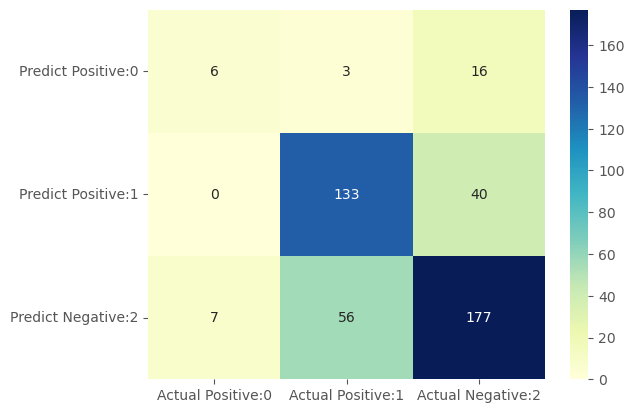

In [104]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:0','Actual Positive:1', 'Actual Negative:2'], 
                                 index=['Predict Positive:0','Predict Positive:1', 'Predict Negative:2'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

Classification Report

In [105]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        HIGH       0.46      0.24      0.32        25
         LOW       0.69      0.77      0.73       173
      MEDIUM       0.76      0.74      0.75       240

    accuracy                           0.72       438
   macro avg       0.64      0.58      0.60       438
weighted avg       0.72      0.72      0.72       438



In [106]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]
Tn = cm[2,2]
Fn = cm[0,2]
fn = cm[1,2]

In [107]:
classification_accuracy = (TP + TN + Tn) / float(TP + TN + FP + FN + Tn + Fn + fn)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.8427


In [108]:
classification_error = (FP + FN + fn + Fn) / float(TP + TN + FP + FN + fn + Fn + Tn)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.1573


In [91]:
print('Training set score: {:.4f}'.format(gnb.score(dense_array, y_train)))

print('Test set score: {:.4f}'.format(gnb.score(dense_test, y_test)))

Training set score: 0.9990
Test set score: 0.7215
